In [659]:
import pandas as pd
import os
df = pd.read_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\FE.csv' , encoding='ISO-8859-1')

cwd = os.getcwd()
#Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE' #pasta onde tenho os fatores de emissão
chapterNumber = 15
subChapter = 2
file = 'chpt_'+str(chapterNumber)+'_'+str(subChapter)+'.csv'


df

,Tipo de Fonte,PM10,"PM2,5",NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",0.0163,0.0159,0.0998,0.0907,0.8165,0.0104
1,Ladle Metallurgical Station,0.0033,0.0019,0.0109,0.0159,0.0113,0.0015
2,"Reheat furnace, natural gas-fired",NaN,NaN,0.0862,NaN,0.0006,0.0001
3,"Annealing furnace, natural gas-fired",0.1600,0.1000,0.1179,NaN,0.0008,NaN
4,Direct reduced iron reformer,NaN,NaN,0.4355,0.0218,NaN,NaN


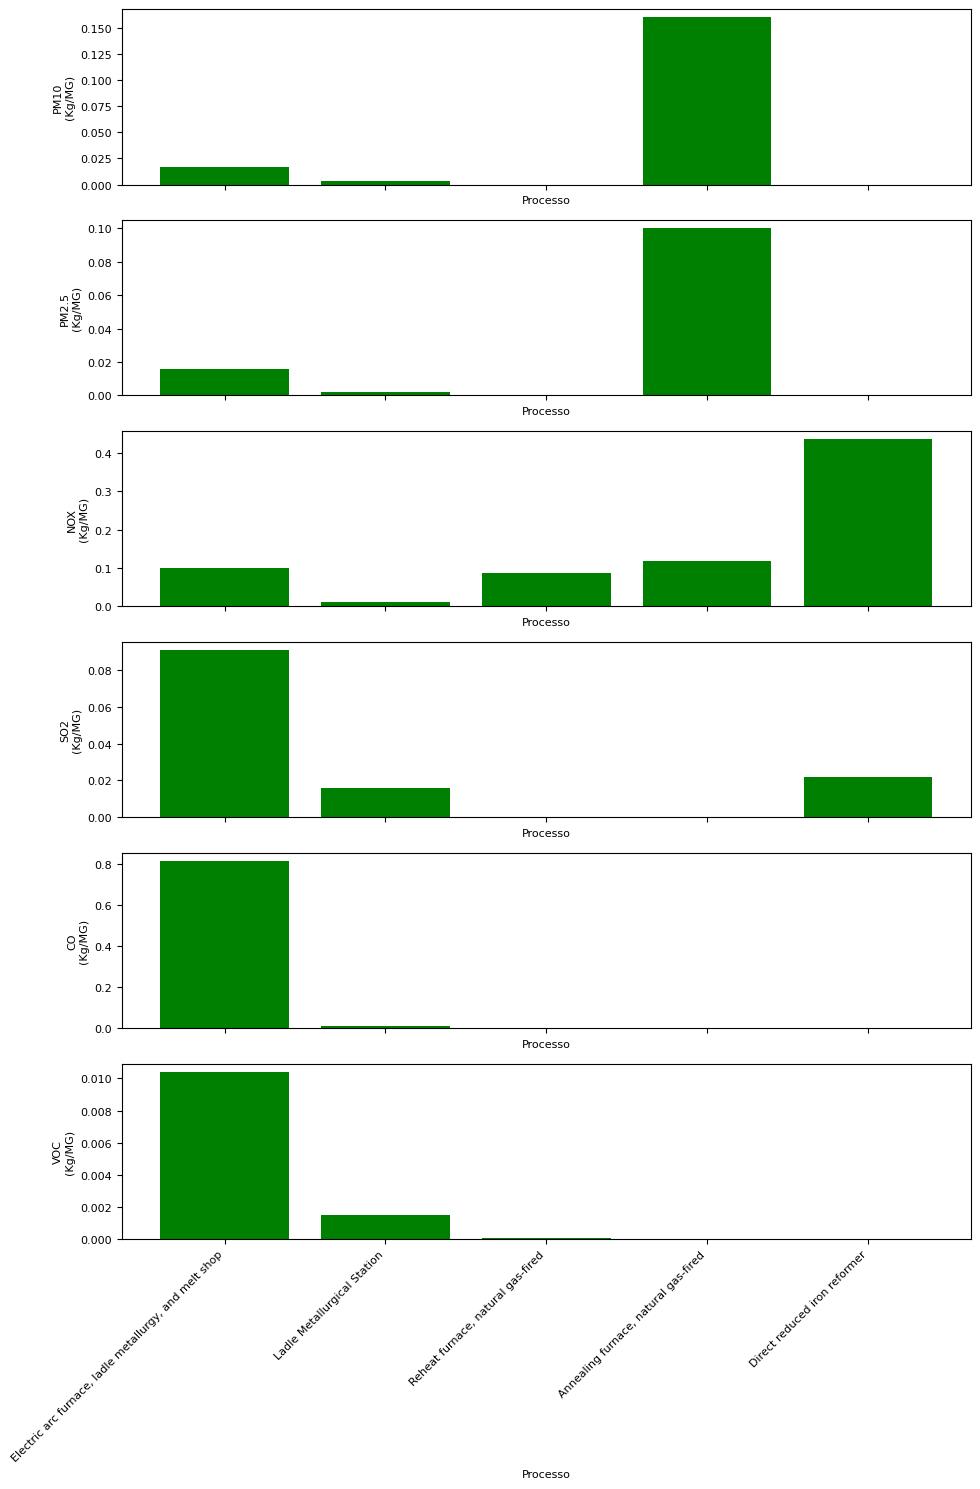

In [569]:
import matplotlib.pyplot as plt
import pandas as pd

# Definindo o DataFrame 'fe' com os dados
fe = pd.DataFrame({
    'Tipo de Fonte': ['Electric arc furnace, ladle metallurgy, and melt shop', 'Ladle Metallurgical Station', 'Reheat furnace, natural gas-fired', 'Annealing furnace, natural gas-fired', 'Direct reduced iron reformer'],
    'PM10': [0.0163, 0.0033, None, 0.1600, None],
    'PM2.5': [0.0159, 0.0019, None, 0.1000, None],
    'NOX': [0.0998, 0.0109, 0.0862, 0.1179, 0.4355],
    'SO2': [0.0907, 0.0159, None, None, 0.0218],
    'CO': [0.8165, 0.0113, 0.0006, 0.0008, None],
    'VOC': [0.0104, 0.0015, 0.0001, None, None]
})


# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
fig, ax = plt.subplots(len(fe.columns) - 1, 1, sharex=True, figsize=(10, 15)) # sharex significa compartilhar o eixo x

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1, len(fe.columns)): # a primeira coluna é a identificação da fonte
    ax[ii-1].bar(fe['Tipo de Fonte'], fe.iloc[:,ii], color='green')
    ax[ii-1].set_xlabel('Processo', fontsize=8) # coloca o eixo x
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(Kg/MG)', fontsize=8)

    ax[ii-1].tick_params(axis='x', labelsize=8)
    ax[ii-1].tick_params(axis='y', labelsize=8)

    ax[ii-1].set_xticks(fe.index)
    ax[ii-1].set_xticklabels(fe['Tipo de Fonte'], rotation=45, ha='right', fontsize=8)

plt.tight_layout()  
plt.show()


In [673]:
#1600000 ton/ano
atv = 4384  #Considerando taxa de atividade em toneladas/dia da minha unidade de São Francisco do Sul
emis = fe*atv


emis

,Tipo de Fonte,PM10,PM2.5,NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",71.4592,69.7056,437.5232,397.6288,3579.5360,45.5936
1,Ladle Metallurgical StationLadle Metallurgical...,14.4672,8.3296,47.7856,69.7056,49.5392,6.5760
2,"Reheat furnace, natural gas-firedReheat furnac...",NaN,NaN,377.9008,NaN,2.6304,0.4384
3,"Annealing furnace, natural gas-firedAnnealing ...",701.4400,438.4000,516.8736,NaN,3.5072,NaN
4,Direct reduced iron reformerDirect reduced iro...,NaN,NaN,1909.2320,95.5712,NaN,NaN


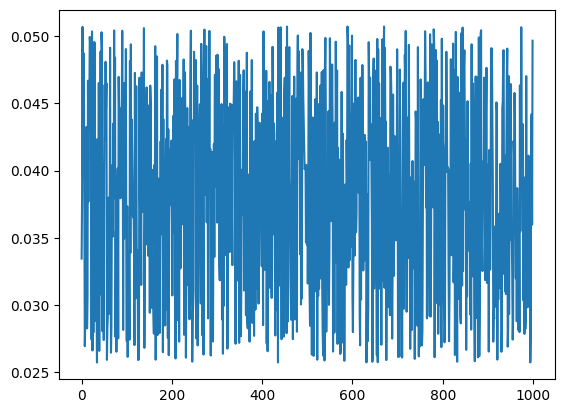

In [665]:
import numpy as np  #ton/s, transformado na mão
atvMax = 0.05073567 #(1600000 ton/ano)
atvMin = 0.0257 #(800000 ton/ano)
n = 1000
atv = (atvMax-atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [602]:
df.iloc[:,0]

0        0
1        1
2        2
3        3
4        4
      ... 
361    361
362    362
363    363
364    364
365    365
Name: Unnamed: 0, Length: 366, dtype: int64

In [603]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})
df

,Data
0,2023-01-01
1,2023-01-02
2,2023-01-03
3,2023-01-04
4,2023-01-05
...,...
360,2023-12-27
361,2023-12-28
362,2023-12-29
363,2023-12-30


In [640]:
import pandas as pd

# Criar um intervalo de datas com frequência horária
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='h')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses e dias das datas e adicioná-los como novas colunas no DataFrame
df['Mes'] = df['Data'].dt.month
df['Dia'] = df['Data'].dt.dayofyear  # criar um array de 1 a 365 e colocar igual a df['Dia']


# Mostrar o DataFrame resultante
df

,Data,Mes,Dia
0,2023-01-01 00:00:00,1,1
1,2023-01-01 01:00:00,1,1
2,2023-01-01 02:00:00,1,1
3,2023-01-01 03:00:00,1,1
4,2023-01-01 04:00:00,1,1
...,...,...,...
8732,2023-12-30 20:00:00,12,364
8733,2023-12-30 21:00:00,12,364
8734,2023-12-30 22:00:00,12,364
8735,2023-12-30 23:00:00,12,364


In [641]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas
atvMax = 0.05073567*3600
atvMin = 0.0257*3600  # Transformando ton/s em ton/hora 

# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd
# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv
#print(atv)
df
#df.to_csv(r'C:\Users\pbeal\OneDrive\Documentos\GitHub\ENS5172_20241\tabelas\FE.csv'encoding='ISO-8859-1')


,Data,Mes,Dia,atividade
0,2023-01-01 00:00:00,1,1,152.987225
1,2023-01-01 01:00:00,1,1,178.962322
2,2023-01-01 02:00:00,1,1,125.057457
3,2023-01-01 03:00:00,1,1,104.306739
4,2023-01-01 04:00:00,1,1,167.065962
...,...,...,...,...
8732,2023-12-30 20:00:00,12,364,135.925735
8733,2023-12-30 21:00:00,12,364,108.836710
8734,2023-12-30 22:00:00,12,364,140.394067
8735,2023-12-30 23:00:00,12,364,145.925959


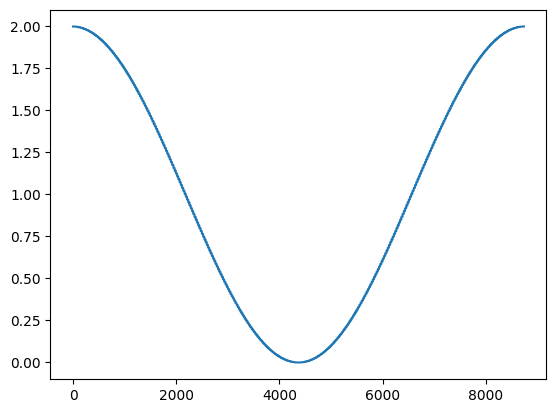

In [656]:

import numpy as np
# Criando componente sazonal
sazonalidade = np.cos((2*np.pi)*df['Dia']/365)+1

df['sazonalidade'] = sazonalidade 

df.to_csv(r'C:\\Users\\pbeal\\OneDrive\\Documentos\\GitHub\\ENS5172_20241\\tabelas\\graf.csv' , encoding='ISO-8859-1')
plt.plot(sazonalidade)

(8737,)


<Axes: >

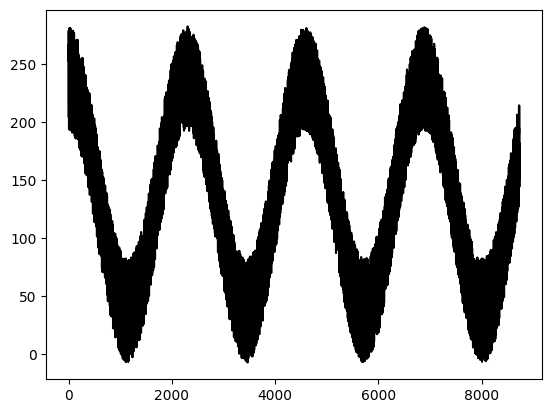

In [658]:
tt = np.arange(0,df.shape[0],1)
print(tt.shape)
df['sazonalidade'] = (np.cos(tt/(365/1)))
df['timeSeries'] = 100*df['sazonalidade']+df['atividade']
#df['sazonal'].plot()
df['timeSeries'].plot(color='black')

In [671]:
df

,Unnamed: 0.1,Unnamed: 0,Data,Mes,Dia,atividade,sazonalidade,aleatorio,aleatorioSazonal
0,0,0,2023-01-01 00:00:00,1,1,152.987225,1.999852,150.228199,428.380160
1,1,1,2023-01-01 01:00:00,1,1,178.962322,1.999852,128.817545,454.355257
2,2,2,2023-01-01 02:00:00,1,1,125.057457,1.999852,161.891546,400.450392
3,3,3,2023-01-01 03:00:00,1,1,104.306739,1.999852,165.727460,379.699674
4,4,4,2023-01-01 04:00:00,1,1,167.065962,1.999852,133.959175,442.458897
...,...,...,...,...,...,...,...,...,...
8732,8732,8732,2023-12-30 20:00:00,12,364,135.925735,1.999852,117.212244,411.318670
8733,8733,8733,2023-12-30 21:00:00,12,364,108.836710,1.999852,179.897201,384.229645
8734,8734,8734,2023-12-30 22:00:00,12,364,140.394067,1.999852,170.833769,415.787002
8735,8735,8735,2023-12-30 23:00:00,12,364,145.925959,1.999852,117.487486,421.318894


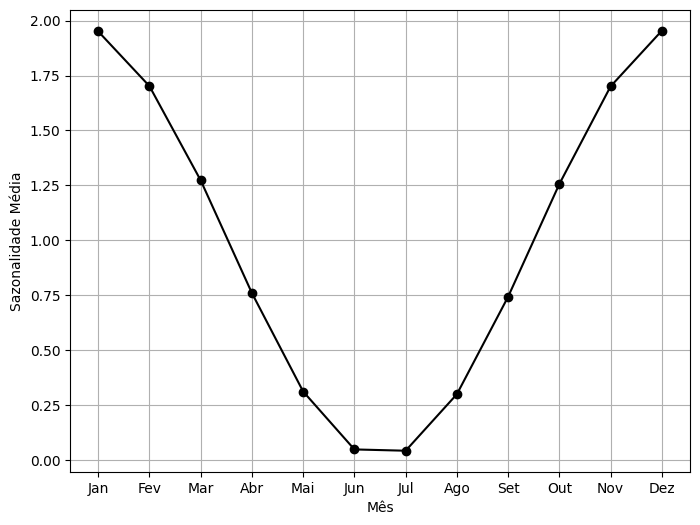

In [660]:
caminho = 'C:\\Users\\pbeal\\OneDrive\\Documentos\\GitHub\\ENS5172_20241\\tabelas\\graf.csv'
df = pd.read_csv(caminho)


media_sazonalidade = df.groupby('Mes')['sazonalidade'].mean()

# Plotar a sazonalidade média ao longo dos meses
plt.figure(figsize=(8, 6))
plt.plot(media_sazonalidade, marker='o', linestyle='-', color='black')
plt.xlabel('Mês')
plt.ylabel('Sazonalidade Média')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

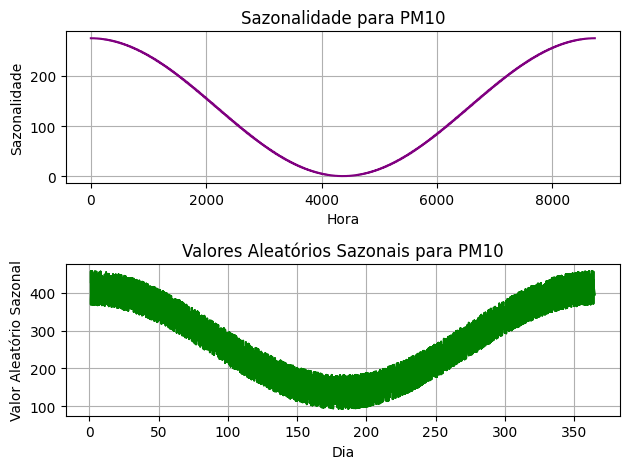

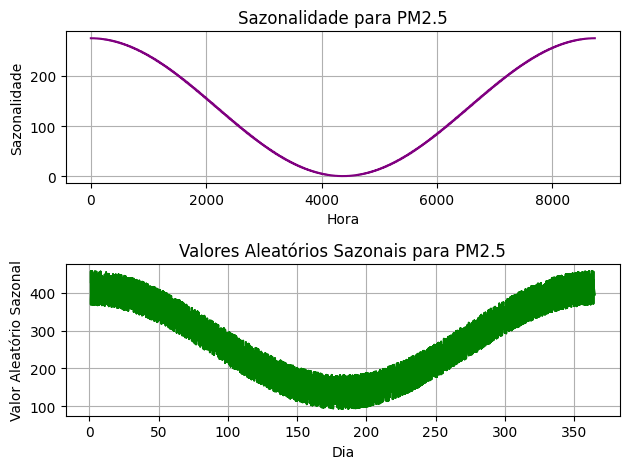

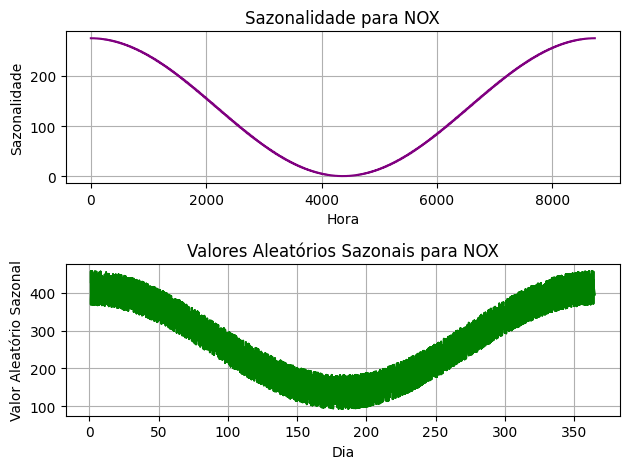

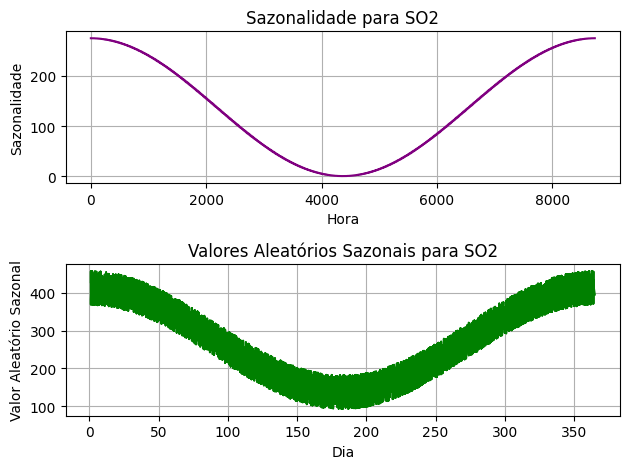

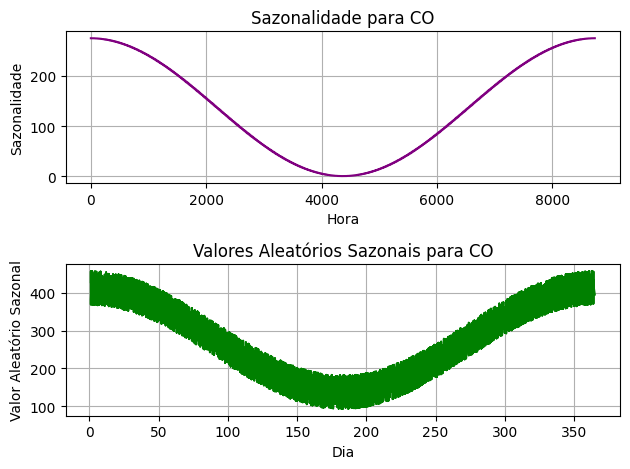

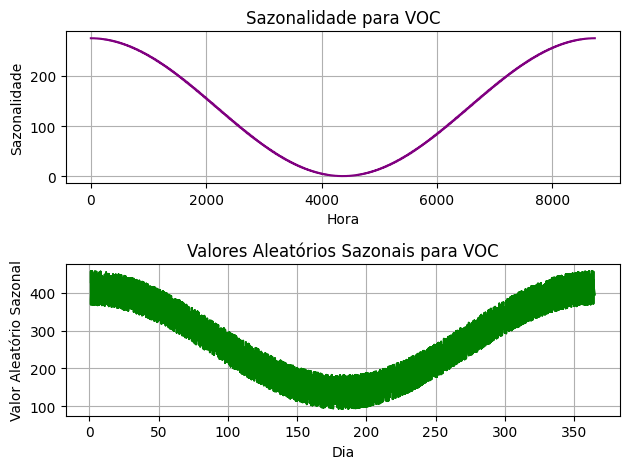

In [662]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponha que você tenha os dados dos poluentes em um DataFrame chamado "df_poluentes"

# Lista de poluentes
poluentes = ['PM10', 'PM2.5', 'NOX', 'SO2', 'CO','VOC']

# Para cada poluente, vamos criar os gráficos
for poluente in poluentes:
    # Criando os valores aleatórios e aleatórios sazonais
    df['aleatorio'] = (atvMax - atvMin) * np.random.rand(n) + atvMin
    aleatorioSazonal = (df['atividade'] + df['sazonalidade'] * df['atividade'].mean())
    df['aleatorioSazonal'] = aleatorioSazonal
    
    # Criando os subplots
    fig, ax = plt.subplots(2)
    
    # Plotando o gráfico dos valores aleatórios com sazonalidade
    ax[1].plot(df['Dia'], df['aleatorioSazonal'], color='green')
    ax[1].set_title('Valores Aleatórios Sazonais para {}'.format(poluente))
    ax[1].set_xlabel('Dia')
    ax[1].set_ylabel('Valor Aleatório Sazonal')
    ax[1].grid(True)
    
    # Plotando o gráfico da sazonalidade
    ax[0].plot(df['sazonalidade'] * df['atividade'].mean(), color='purple')
    ax[0].set_title('Sazonalidade para {}'.format(poluente))
    ax[0].set_xlabel('Hora')
    ax[0].set_ylabel('Sazonalidade')
    ax[0].grid(True)
    
    plt.tight_layout()
    plt.show()

In [669]:
df

,Unnamed: 0.1,Unnamed: 0,Data,Mes,Dia,atividade,sazonalidade,aleatorio,aleatorioSazonal
0,0,0,2023-01-01 00:00:00,1,1,152.987225,1.999852,150.228199,428.380160
1,1,1,2023-01-01 01:00:00,1,1,178.962322,1.999852,128.817545,454.355257
2,2,2,2023-01-01 02:00:00,1,1,125.057457,1.999852,161.891546,400.450392
3,3,3,2023-01-01 03:00:00,1,1,104.306739,1.999852,165.727460,379.699674
4,4,4,2023-01-01 04:00:00,1,1,167.065962,1.999852,133.959175,442.458897
...,...,...,...,...,...,...,...,...,...
8732,8732,8732,2023-12-30 20:00:00,12,364,135.925735,1.999852,117.212244,411.318670
8733,8733,8733,2023-12-30 21:00:00,12,364,108.836710,1.999852,179.897201,384.229645
8734,8734,8734,2023-12-30 22:00:00,12,364,140.394067,1.999852,170.833769,415.787002
8735,8735,8735,2023-12-30 23:00:00,12,364,145.925959,1.999852,117.487486,421.318894


In [674]:
# Fazer a somatória das emissões de todos os processos
atv = 183  #Considerando taxa de atividade em toneladas/hora da minha unidade de São Francisco do Sul
emis = fe*atv


emis



,Tipo de Fonte,PM10,PM2.5,NOX,SO2,CO,VOC
0,"Electric arc furnace, ladle metallurgy, and me...",2.9829,2.9097,18.2634,16.5981,149.4195,1.9032
1,Ladle Metallurgical StationLadle Metallurgical...,0.6039,0.3477,1.9947,2.9097,2.0679,0.2745
2,"Reheat furnace, natural gas-firedReheat furnac...",NaN,NaN,15.7746,NaN,0.1098,0.0183
3,"Annealing furnace, natural gas-firedAnnealing ...",29.2800,18.3000,21.5757,NaN,0.1464,NaN
4,Direct reduced iron reformerDirect reduced iro...,NaN,NaN,79.6965,3.9894,NaN,NaN
